In [419]:
#importing necessary libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [323]:
sns.set_style('darkgrid')  
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']= (9,5)
plt.rcParams['figure.facecolor']= '#FFE5B4'

In [324]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [325]:
titanic_df.shape

(891, 12)

There are 891 rows and 12 columns in the dataset

In [326]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Checking the datatypes of the columns

In [327]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

So only Name, Sex, and Fare column contains string data whiles the remaining contains float and integers values

## Investigating if there are some Null values in the dataset

In [328]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Yes, there appear to be some null values in Age column with 177,  Cabin with 687 and Embarked with 2, since the null values are comparatively many we will replace them with the mean

## Threating Null values

### Handling Age Feature

In [329]:
titanic_df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

Age column does not have any other symbol of empty string, lets deal with the NaN values

In [330]:
titanic_df.loc[titanic_df['Age'].isnull()] #checking the index or locations of the missing values in Age column

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [331]:
int(np.mean(titanic_df['Age']))

29

In [332]:
titanic_df['Age'] = titanic_df['Age'].fillna(int(np.mean(titanic_df['Age']))) #replacing the null values with the mean of the column

In [333]:
titanic_df.iloc[889,:]

PassengerId                      890
Survived                           1
Pclass                             1
Name           Behr, Mr. Karl Howell
Sex                             male
Age                             26.0
SibSp                              0
Parch                              0
Ticket                        111369
Fare                            30.0
Cabin                           C148
Embarked                           C
Name: 889, dtype: object

### Handling the Cabin Feature

In [334]:
titanic_df['Cabin'].unique() 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabin column does not have any other unwanted symbol, we will replace the Nan values with them most frequent value 

In [335]:
titanic_df.loc[titanic_df['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1,2,W./C. 6607,23.4500,NaN,S


In [336]:
titanic_df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [337]:
titanic_df['Cabin'] = titanic_df['Cabin'].fillna(titanic_df['Cabin'].mode()[0]) ## replacing the Nan with mode

In [338]:
titanic_df['Cabin']

0      B96 B98
1          C85
2      B96 B98
3         C123
4      B96 B98
        ...   
886    B96 B98
887        B42
888    B96 B98
889       C148
890    B96 B98
Name: Cabin, Length: 891, dtype: object

### Handling Embarked Feature

In [339]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Embarked feature appears to have no strange symbol

In [340]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [341]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [342]:
titanic_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [343]:
titanic_df.isnull().sum() ## checking the threatment of all the missing values in the features

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

All missing values have been replaced, there are no missing values anymore

## Exploratory Data Analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

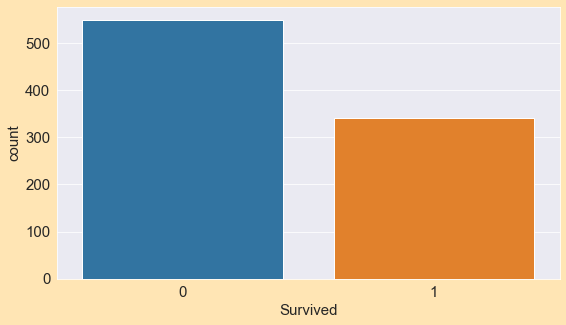

In [344]:
sns.countplot(x='Survived', data = titanic_df) #checking number of people who died and number of people who survived

The number of people who died are significantly greater than the number that survived with around 550 people died and 350 people survived

<AxesSubplot:xlabel='Pclass', ylabel='count'>

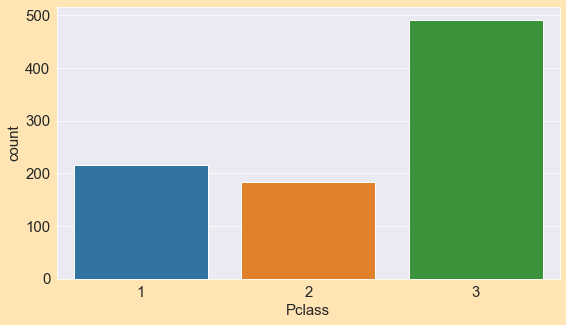

In [345]:
sns.countplot(x='Pclass', data = titanic_df)

A significant number of people boarded the 3rd class approximately 490 people, few were in the 2nd class and first class difference is not significant around 210 in the 1st class and 190 in the 2nd class

<AxesSubplot:xlabel='Sex', ylabel='count'>

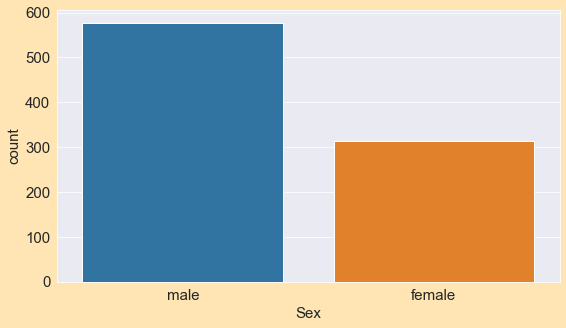

In [346]:
sns.countplot(x='Sex', data= titanic_df)

The number of male passengers is greater female passengers, with approximately 580 passengers being males and 310 being females

<AxesSubplot:xlabel='SibSp', ylabel='count'>

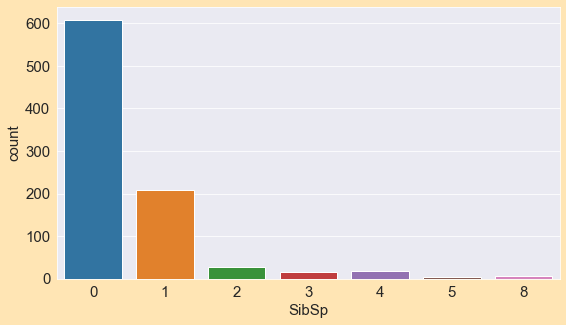

In [347]:
sns.countplot(x='SibSp', data= titanic_df)

Greater number of people have no siblings of spouse abroad 

<AxesSubplot:xlabel='Parch', ylabel='count'>

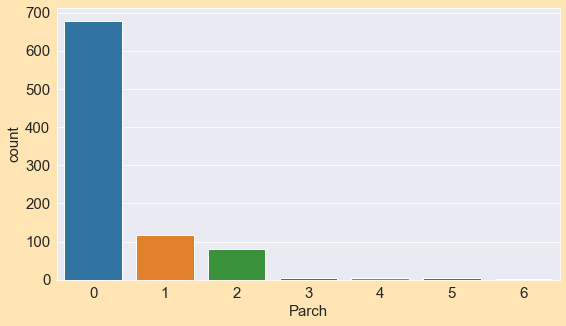

In [348]:
sns.countplot(x='Parch', data= titanic_df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

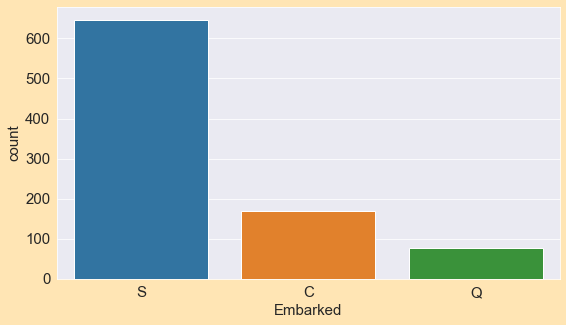

In [349]:
sns.countplot(x='Embarked', data= titanic_df)

Majority of the passengers embarked from southhampton having around 650 people and the least number of passengers embarked from Queenstown with 190 people, Cherebourg passengers were around 150.

## Comparing the distribution of the features with the target variable (survive)

Text(0.5, 1.0, 'Passenger class and Survival')

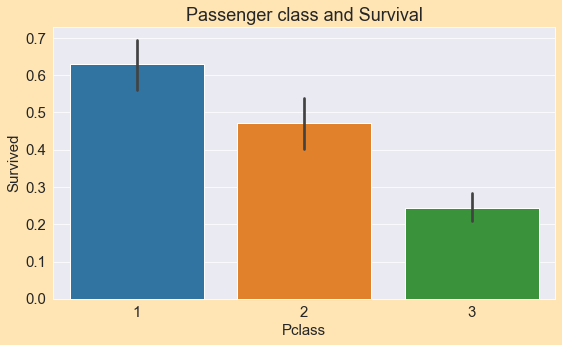

In [350]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df)
plt.title('Passenger class and Survival')

A high number of passengers who died are found in the 1st class, followed by passengers in the 2nd class, comparatively least number of passengers died in the 3rd class, there is a high chance of survival if you were found in the 1st class than in the 3rd class

Text(0.5, 1.0, 'Fare and Survival')

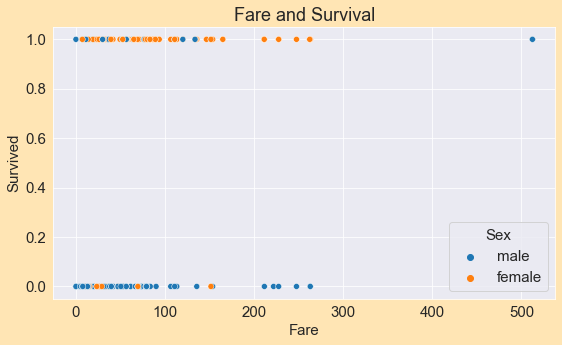

In [351]:
sns.scatterplot(x='Fare',y='Survived',hue = 'Sex',data=titanic_df)
plt.title('Fare and Survival')

Alot of females passengers survived compared to male passengers, Also the fare is distributed in the range of 0 to 150, with slightly higher number being females, it appears slightly high number of females purchaced expensive fare

Text(0.5, 1.0, 'Age and Survival')

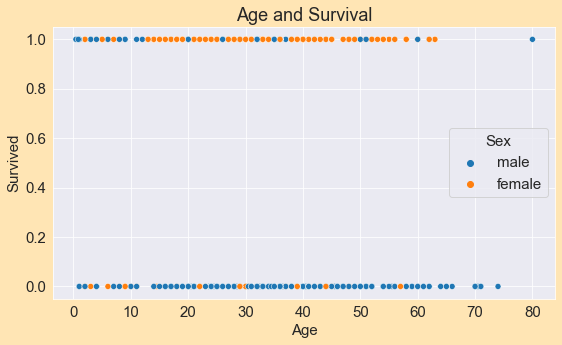

In [352]:
sns.scatterplot(x='Age',y='Survived',hue = 'Sex',data=titanic_df)
plt.title('Age and Survival')

Majority of the male passengers who died were aged between 15 and 65 years, with some few males below 15 years who died, also a lot of the females who survived are aged between 15 and 58 years.

## Normal Distribution curves and box plots continuous variables

<AxesSubplot:title={'center':'Box plot of Age'}, xlabel='Age'>

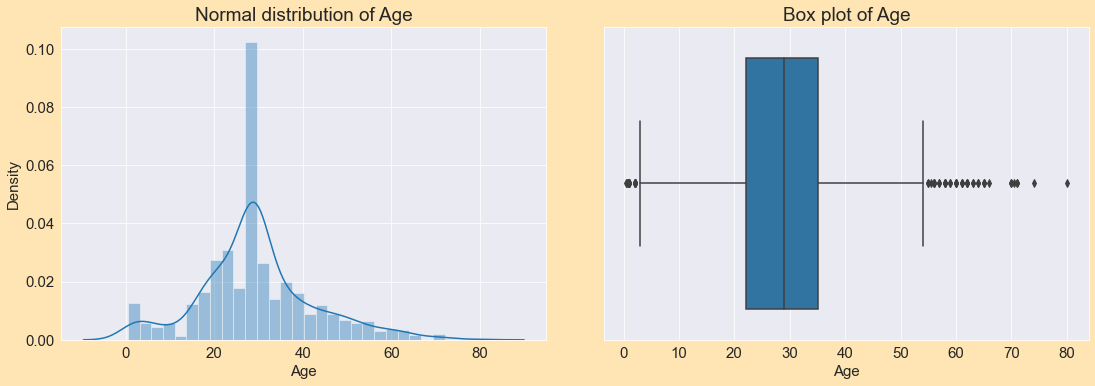

In [353]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Normal distribution of Age', fontsize = 19)
sns.distplot(titanic_df['Age'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Age', fontsize = 19)
sns.boxplot(titanic_df['Age'], ax = axes[1])


The minimum age is 0 and maximum 80, Age column have a lot of outliers. this will be treated latter. Age column is not a normalluy distributed

<AxesSubplot:title={'center':'Box plot of Fare'}, xlabel='Age'>

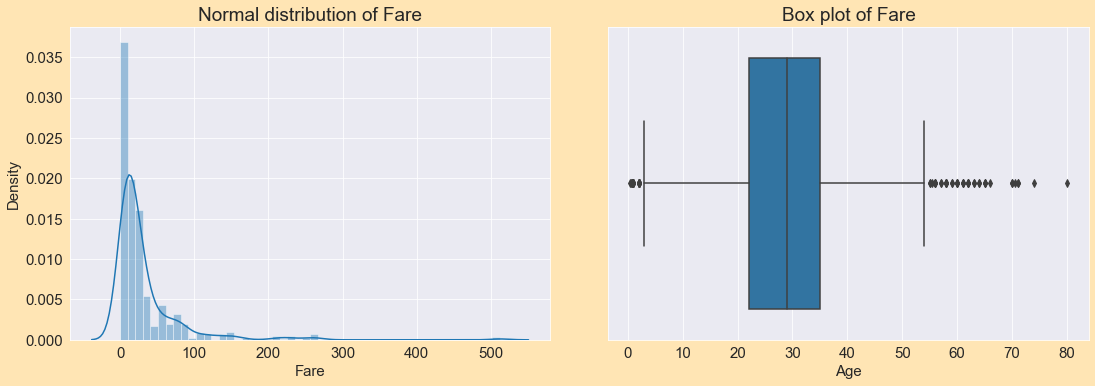

In [354]:
fig, axes = plt.subplots(1,2, figsize = (16, 6))
plt.tight_layout(pad = 2)
axes[0].set_title('Normal distribution of Fare', fontsize = 19)
sns.distplot(titanic_df['Fare'], ax = axes[0])

plt.tight_layout(pad=2)
axes[1].set_title('Box plot of Fare', fontsize = 19)
sns.boxplot(titanic_df['Age'], ax = axes[1])

Fare feature is also not nomally distributed and it is seems to be right skewed, also have a  lot of outliers 

## Corrrelation

In [355]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033632,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500
Age,0.033632,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.057527,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000


<AxesSubplot:>

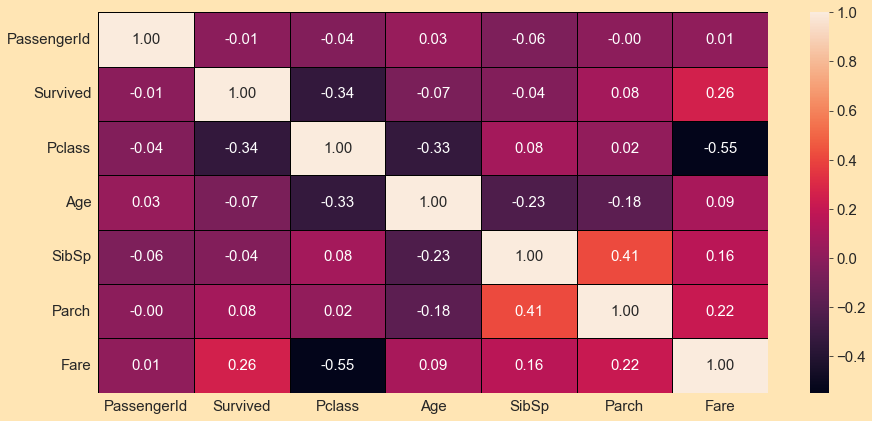

In [356]:
plt.figure(figsize=(15,7))
sns.heatmap(titanic_df.corr(), annot= True, linewidths =0.5, linecolor ='black', fmt='.2f')


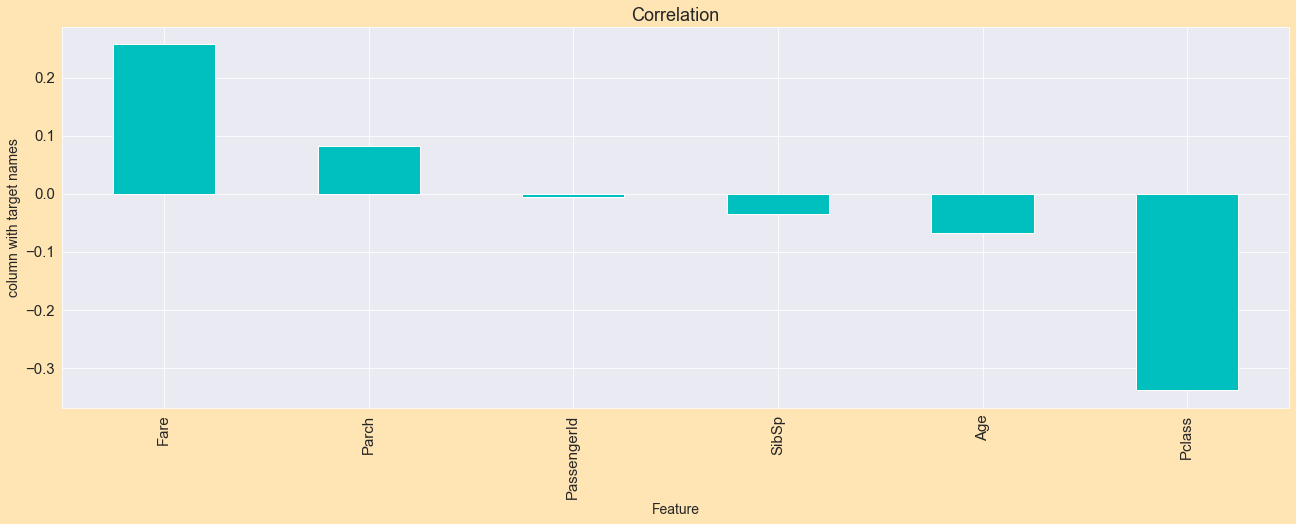

In [357]:
plt.figure(figsize=(22,7))
titanic_df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize = 18)
plt.show()

PassengerId has a very negative correlation with the target column(survived) 1 percent, Pcalss feature also have negative correlationg with the target column 34 percent which can be considered as a good bond, age has a very weak negative correlation with target column 7 percent, SibSp also has very weak negative correlation with the target variable same goes to Parch feature with 8 percent correlation, Fare has a fairly good relationship with the target variable with 26 percent correlation

## Summary of the dataset

In [358]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

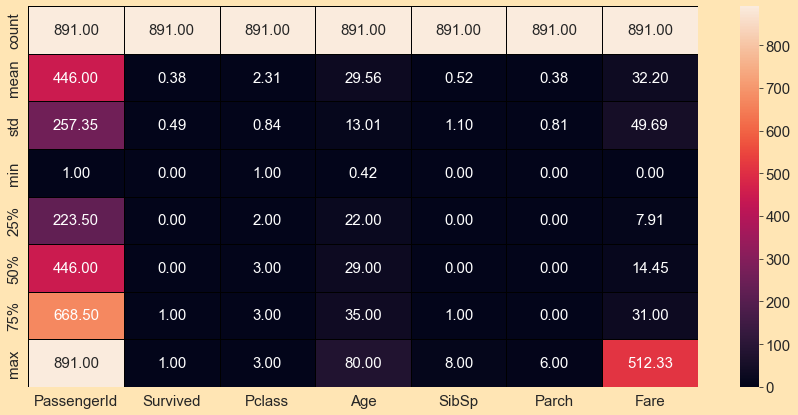

In [359]:
plt.figure(figsize = (15,7))
sns.heatmap(titanic_df.describe(), annot = True, linewidths = 0.5, linecolor = 'black', fmt ='.2f')

### Observation of summary
Total number of rows and columns in the dataset
1. 687 rows
2. 12 columns

PassengerId:

 1. mean=446
 2. std=257
 3. max_value =891
 4. min_value= 1

Survived:

 1. mean= 0.38
 2. std= 0.49
 3. max_value =1
 4. min_value =0

Pclass:
1.  mean=2.31
2.  std=0.84
3.  max_value = 3
4.  min_value =1

Age:
1.  mean=29.56
2. std= 13
3.  max_value = 80
4.  min_value= 0.42

SibSp:
1.  mean=0.52
2.  std=1.10
3.  max_value= 8
4.  min_value =0

Parch:
1. mean=0.81
2. std= 0.38
3. max_value= 6
4. min_value =0

Fare:
1.  mean=32.20
2.  std= 49.6
3.  max_value= 512
4.  min_value =0

In [360]:
titanic_df.info() # checking the data types and missing values again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [361]:
titanic_df.duplicated().sum() # checking if there are any duplicates in the data

0

### Skewness Checking

In [362]:
titanic_df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.466268
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

Threshold of skewness taken is +/-0.5, Columns which have skewness:
1. Pclass
2. SibSp 
3. Parch
4. Fare

## Ecoding the Sex and Embarked Feature

In [363]:
data_df =titanic_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']] #droping the irrelevant columns

In [365]:
data_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,29.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [366]:
enc = OrdinalEncoder()
for i in data_df.columns:
    if data_df[i].dtypes == 'object':
        data_df[i]=enc.fit_transform(data_df[i].values.reshape(-1,1))

In [367]:
#selecting independent and dependent variables

y = data_df['Survived']#dependent variable
x = data_df.drop(['Survived'], axis =1)#independent variable

## Feature Selection

#### Mutual information classification

In [368]:
from sklearn.feature_selection import mutual_info_classif

In [369]:
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state =100, test_size = 0.3) # splting the dataset 

In [370]:
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.01695626, 0.04628134, 0.16446903, 0.05142736, 0.04859808,
       0.06258686, 0.13356308, 0.        ])

In [371]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

Sex            0.164469
Fare           0.133563
Parch          0.062587
Age            0.051427
SibSp          0.048598
Pclass         0.046281
PassengerId    0.016956
Embarked       0.000000
dtype: float64

Text(0.5, 0, 'Feature')

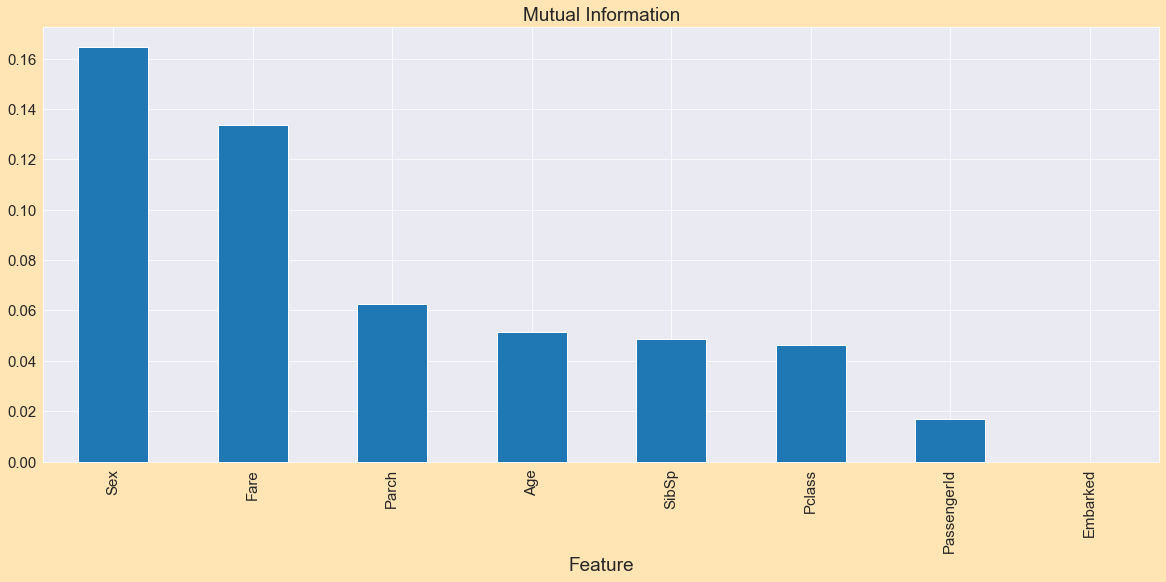

In [372]:
mutual_info.sort_values(ascending=False).plot.bar(figsize =(20,8))
plt.title('Mutual Information', fontsize= 19)
plt.xlabel('Feature',fontsize = 19)

Sex, Fare, Pclass, Age and SibSp seems to be the most important features, I will double check from other feature selction algorithm

## Chi-Square Test

In [373]:
from sklearn.feature_selection import chi2

In [374]:
f_p_values = chi2(x_train, y_train)
f_p_values

(array([5.24579963e+01, 2.19799415e+01, 6.56792950e+01, 9.97514120e+00,
        5.19372431e-01, 2.93865962e+00, 3.25828769e+03, 7.07012929e+00]),
 array([4.39549635e-13, 2.75514881e-06, 5.30603805e-16, 1.58667828e-03,
        4.71109508e-01, 8.64824703e-02, 0.00000000e+00, 7.83795993e-03]))

In [375]:
p_values = pd.Series(f_p_values[1]) ##taking only the p-values from the test
p_values.index = x_train.columns
p_values.sort_values(ascending=False)

SibSp          4.711095e-01
Parch          8.648247e-02
Embarked       7.837960e-03
Age            1.586678e-03
Pclass         2.755149e-06
PassengerId    4.395496e-13
Sex            5.306038e-16
Fare           0.000000e+00
dtype: float64

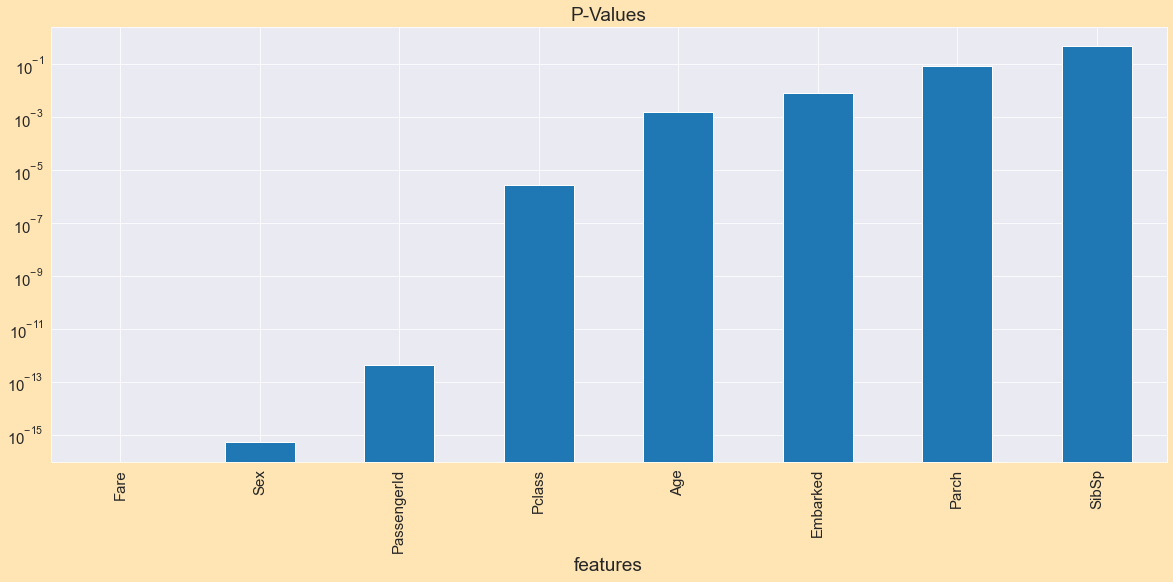

In [376]:
g =p_values.sort_values(ascending=True).plot.bar(figsize =(20,8)) 
plt.title('P-Values', fontsize = 19)
plt.xlabel('features',fontsize = 19)
g.set_yscale("log")

From the p-values it confirms our initial tests that Fare, sex, Pclass and age appears to be the most important features since their p-values are below the 0.05 significant level, passengerId will be dropped since it has a very weak relationship with the target variable

In [377]:
drop_features = pd.DataFrame([["-0.01","PassengerId","4.395496e-13"],["-0.03","SibSp"," 4.711095e-01"],["0.08","Parch","8.648247e-02"]],columns=["Correlation with targer","column name","P-Value"])
drop_features

,Correlation with targer,column name,P-Value
0,-0.01,PassengerId,4.395496e-13
1,-0.03,SibSp,4.711095e-01
2,0.08,Parch,8.648247e-02


In [378]:
data_df = data_df.drop(["PassengerId","SibSp", "Parch", ], axis =1)
data_df

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1.0,22.0,7.2500,2.0
1,1,1,0.0,38.0,71.2833,0.0
2,1,3,0.0,26.0,7.9250,2.0
3,1,1,0.0,35.0,53.1000,2.0
4,0,3,1.0,35.0,8.0500,2.0
...,...,...,...,...,...,...
886,0,2,1.0,27.0,13.0000,2.0
887,1,1,0.0,19.0,30.0000,2.0
888,0,3,0.0,29.0,23.4500,2.0
889,1,1,1.0,26.0,30.0000,0.0


## Transforming the data

In [379]:
from sklearn.preprocessing import power_transform
x = power_transform(x, method='yeo-johnson')

In [380]:
x

array([[-2.14814111,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [-2.13183003, -1.45912855, -1.35557354, ..., -0.56025296,
         1.33665056, -1.78052001],
       [-2.117043  ,  0.86397329, -1.35557354, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [ 1.55071925,  0.86397329, -1.35557354, ...,  1.84685634,
         0.28888536,  0.61041095],
       [ 1.55371741, -1.45912855,  0.73769513, ..., -0.56025296,
         0.52790578, -1.78052001],
       [ 1.5567146 ,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [381]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-2.14814111,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.87882001,  0.61041095],
       [-2.13183003, -1.45912855, -1.35557354, ..., -0.56025296,
         1.33665056, -1.78052001],
       [-2.117043  ,  0.86397329, -1.35557354, ..., -0.56025296,
        -0.79006485,  0.61041095],
       ...,
       [ 1.55071925,  0.86397329, -1.35557354, ...,  1.84685634,
         0.28888536,  0.61041095],
       [ 1.55371741, -1.45912855,  0.73769513, ..., -0.56025296,
         0.52790578, -1.78052001],
       [ 1.5567146 ,  0.86397329,  0.73769513, ..., -0.56025296,
        -0.81234947, -1.23633916]])

In [382]:
#oversampling the data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x,y = sm.fit_resample(x,y)

In [383]:
y.value_counts() #checking value count of target column

0    549
1    549
Name: Survived, dtype: int64

## Training the Model

In [390]:
lr = LogisticRegression()

In [391]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y, random_state =i, test_size = 0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)== round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i, 'the model perfoms very well')
        print('At random state:-', i)
        print('Training accuracy is:', accuracy_score(y_train,pred_train)*100)
        print('Testing accuracy is:', accuracy_score(y_test,pred_test)*100)
        print('\n')

At random state 163 the model perfoms very well
At random state:- 163
Training accuracy is: 78.24601366742597
Testing accuracy is: 78.18181818181819


At random state 301 the model perfoms very well
At random state:- 301
Training accuracy is: 77.67653758542141
Testing accuracy is: 77.72727272727272


At random state 341 the model perfoms very well
At random state:- 341
Training accuracy is: 78.24601366742597
Testing accuracy is: 78.18181818181819


At random state 415 the model perfoms very well
At random state:- 415
Training accuracy is: 77.67653758542141
Testing accuracy is: 77.72727272727272


At random state 482 the model perfoms very well
At random state:- 482
Training accuracy is: 77.33485193621867
Testing accuracy is: 77.27272727272727


At random state 617 the model perfoms very well
At random state:- 617
Training accuracy is: 78.5876993166287
Testing accuracy is: 78.63636363636364


At random state 668 the model perfoms very well
At random state:- 668
Training accuracy is: 78.

In [392]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = .20, random_state = 668)

In [394]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.53      0.56      0.55       110
           1       0.53      0.50      0.52       110

    accuracy                           0.53       220
   macro avg       0.53      0.53      0.53       220
weighted avg       0.53      0.53      0.53       220



## Cross Validation

In [397]:
pred_lr = lr.predict(x_test)
lss = accuracy_score(y_test,pred_lr)
for i in range(2,10):
    lsscore = cross_val_score(lr,x,y, cv =i)
    lsc = lsscore.mean()
    print('At cv:',i)
    print('cross validation score is:-', lsc*100)
    print('accuracy_score is:-',lss*100)
    
    print('\n')

At cv: 2
cross validation score is:- 60.56466302367942
accuracy_score is:- 79.54545454545455


At cv: 3
cross validation score is:- 73.13296903460838
accuracy_score is:- 79.54545454545455


At cv: 4
cross validation score is:- 75.5932315859323
accuracy_score is:- 79.54545454545455


At cv: 5
cross validation score is:- 75.95599833955998
accuracy_score is:- 79.54545454545455


At cv: 6
cross validation score is:- 76.59380692167578
accuracy_score is:- 79.54545454545455


At cv: 7
cross validation score is:- 77.04614917990715
accuracy_score is:- 79.54545454545455


At cv: 8
cross validation score is:- 77.04763038188935
accuracy_score is:- 79.54545454545455


At cv: 9
cross validation score is:- 77.86885245901638
accuracy_score is:- 79.54545454545455




The scores are almost the same in the above cross-validation we will take the one with least difference between the accuracy on test data and cross validation

In [400]:
selected_score = cross_val_score(lr,x,y, cv = 9).mean()
print('The cv score is:',selected_score*100,'\nThe accuracy score is:', lss*100)

The cv score is: 77.86885245901638 
The accuracy score is: 79.54545454545455


In [403]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8545454545454545
[[99 11]
 [21 89]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.89      0.81      0.85       110

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



In [404]:
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('Difference between accuracy and cross validation score is', accuracy_score(y_test,predRFC)-score.mean())

[0.61363636 0.62727273 0.48181818 0.79908676 0.47945205]
0.6002532171025321
Difference between accuracy and cross validation score is 0.2542922374429224


In [405]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.85
[[100  10]
 [ 23  87]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.90      0.79      0.84       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



In [406]:
#checking cv score for support vector machine classifier
score = cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy and cross validation score is', accuracy_score(y_test,predsvc)-score.mean())

[0.79090909 0.83181818 0.79545455 0.79908676 0.77625571]
0.7987048567870485
Difference between accuracy and cross validation score is 0.05129514321295148


In [409]:
#checking accuracy for Gradient boosting classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8545454545454545
[[98 12]
 [20 90]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       110
           1       0.88      0.82      0.85       110

    accuracy                           0.85       220
   macro avg       0.86      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220



In [410]:
score = cross_val_score(GB,x,y)
print(score)
print(score.mean())
print('Difference between accuracy and cross validation score is', accuracy_score(y_test,predGB)-score.mean())

[0.45909091 0.38636364 0.32272727 0.44748858 0.39726027]
0.40258613532586135
Difference between accuracy and cross validation score is 0.45195931921959315


In [411]:
#checking accuracy for Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
predtc = dtc.predict(x_test)
print(accuracy_score(y_test,predtc))
print(confusion_matrix(y_test,predtc))
print(classification_report(y_test,predtc))

0.7727272727272727
[[85 25]
 [25 85]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       110
           1       0.77      0.77      0.77       110

    accuracy                           0.77       220
   macro avg       0.77      0.77      0.77       220
weighted avg       0.77      0.77      0.77       220



In [412]:
score = cross_val_score(dtc,x,y)
print(score)
print(score.mean())
print('Difference between accuracy and cross validation score is', accuracy_score(y_test,predtc)-score.mean())

[0.48636364 0.52272727 0.41818182 0.74429224 0.44748858]
0.5238107098381071
Difference between accuracy and cross validation score is 0.24891656288916564


Support vector classifier has the least difference between accuracy and cross validation score, support vector will be use for hyperparameter tunning

### Hyperparameter tunning

In [414]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.682 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.640 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.669 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.767 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.773 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.749 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.761 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.709 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.750 total time=   0.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.800 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.801 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.795 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.789 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [415]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [417]:
#final model
fin_mod = SVC(C = 10, gamma =0.1, kernel ='rbf')
fin_mod.fit(x_train, y_train)
pred = fin_mod.predict(x_test)
print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

85.0
[[100  10]
 [ 23  87]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.90      0.79      0.84       110

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.85      0.85      0.85       220



Accuracy after tunning the model is 85 percent which is quite good

## ROC curve

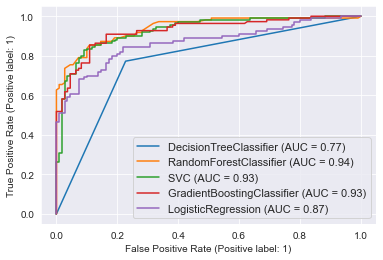

In [421]:
disp = plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(RFC, x_test,y_test, ax = disp.ax_)

plot_roc_curve(fin_mod, x_test, y_test, ax = disp.ax_)
plot_roc_curve(GB, x_test,y_test,ax = disp.ax_)
plot_roc_curve(lr, x_test,y_test,ax = disp.ax_)

plt.legend(prop={'size':11},loc = 'lower right')
plt.show()

## Saving the Model

In [422]:
import pickle
filename = 'Titanic_prediction.pkl'
pickle.dump(fin_mod,open(filename,'wb'))

## Conclusion

In [423]:
load_model = pickle.load(open('Titanic_prediction.pkl','rb'))
result = load_model.score(x_test,y_test)
result*100

85.45454545454545

In [425]:
c = np.array(y_test)
predicted= np.array(lr.predict(x_test))
df_com =pd.DataFrame({'original':c,'predicted':predicted},index=range(len(c)))
df_com

,original,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
...,...,...
215,1,1
216,1,1
217,1,1
218,0,0
